In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# [Size (sqft), Bedrooms, Age (years), Price ($1000s)]
data = [
  [650, 1, 20, 70],
  [800, 2, 15, 85],
  [900, 2, 30, 78],
  [1100, 3, 18, 112],
  [1200, 3, 10, 120],
  [1400, 3, 12, 135],
  [1500, 4, 8, 160],
  [1700, 4, 6, 170],
  [1850, 4, 5, 175],
  [2000, 5, 4, 210]
]

x1 = [row[0] for row in data]
x2 = [row[1] for row in data]
x3 = [row[2] for row in data]
ys = [row[3] for row in data]
m = len(data)

In [3]:
def normalize(x:list):
  """z-square normalization"""
  mean_x = sum(x) / m
  std_x = (sum((x - mean_x) ** 2 for x in x) / m) ** 0.5
  x_norm = [(x - mean_x) / std_x for x in x]
  return x_norm

x1_norm = normalize(x1)
x2_norm = normalize(x2)
x3_norm = normalize(x3)
x3_norm

[0.9329430889680195,
 0.2850659438513392,
 2.22869737920138,
 0.6737922309213474,
 -0.36281120126534105,
 -0.10366034321866893,
 -0.6219620593120132,
 -0.8811129173586852,
 -1.0106883463820213,
 -1.1402637754053573]

In [4]:
x = [[x1_norm[i], x2_norm[i], x3_norm[i]] for i in range(m)]
w = [0.0,0.0,0.0]
b = 0.0
learning_rate = 0.000001
epochs = 2000
tolerance = 1e-6
prev_cost = float('inf')

for epoch in range(epochs):
  dw = [0.0]*3
  db = 0.0

  for i in range(m):
    x_i = x[i]
    y_pred = sum(w[j]*x_i[j] for j in range(3)) + b
    error = y_pred-ys[i]

    for j in range(3):
      dw[j] += error * x_i[j]
    db += error
  
  for j in range(3):
    dw[j] /= m
  db/=m

  for j in range(3):
    w[j] -= learning_rate * dw[j]
  b -= learning_rate * db

  if epoch % 100 == 0:
      # Optional: print progress
      cost = sum( (sum(w[j]*x_i[j] for j in range(3)) + b - ys[i])**2 for i in range(m) ) / m
      if (abs(cost - prev_cost) < tolerance):
          print(f"Stopped at epoch {epoch}")
          break
      prev_cost = cost
      print(f"Epoch {epoch}: cost = {cost:.4f}")

# Final model
print("\nTrained model:")
print(f"w = {w}, b = {b:.4f}")

Epoch 0: cost = 19260.2166
Epoch 100: cost = 19251.8773
Epoch 200: cost = 19243.5418
Epoch 300: cost = 19235.2099
Epoch 400: cost = 19226.8817
Epoch 500: cost = 19218.5572
Epoch 600: cost = 19210.2363
Epoch 700: cost = 19201.9192
Epoch 800: cost = 19193.6057
Epoch 900: cost = 19185.2959
Epoch 1000: cost = 19176.9897
Epoch 1100: cost = 19168.6873
Epoch 1200: cost = 19160.3885
Epoch 1300: cost = 19152.0933
Epoch 1400: cost = 19143.8019
Epoch 1500: cost = 19135.5140
Epoch 1600: cost = 19127.2299
Epoch 1700: cost = 19118.9494
Epoch 1800: cost = 19110.6726
Epoch 1900: cost = 19102.3994

Trained model:
w = [0.08731392722782352, 0.08614013936890064, -0.07664581236432165], b = 0.2627


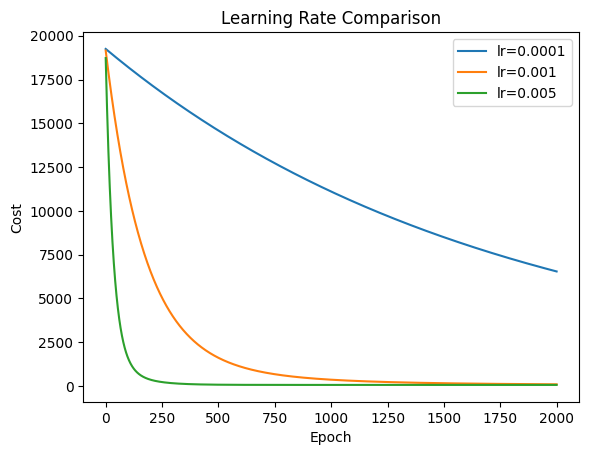

In [19]:
# learning rate sweep visualization
x = [[x1_norm[i], x2_norm[i], x3_norm[i]] for i in range(m)]
learning_rates = [0.0001, 0.001, 0.005]
epochs = 2000
all_costs = []

for lr in learning_rates:
  w = [0.0,0.0,0.0]
  b = 0.0
  costs = []
  for epoch in range(epochs):
    dw = [0.0]*3
    db = 0.0

    for i in range(m):
      y_pred = sum(w[j] * x[i][j] for j in range(3)) + b
      error = y_pred - ys[i]
      for j in range(3):
          dw[j] += error * x[i][j]
      db += error
    for j in range(3):
      w[j] -= lr * dw[j] / m
    b -= lr * db / m

    # Record cost
    cost = sum((sum(w[j] * x[i][j] for j in range(3)) + b - ys[i]) ** 2 for i in range(m)) / m
    costs.append(cost)

  all_costs.append((lr, costs))

# Plot cost curves
for lr, costs in all_costs:
    plt.plot(range(epochs), costs, label=f"lr={lr}")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.title("Learning Rate Comparison")
plt.show()

In [5]:
# adaptive learning rate
x = [[x1_norm[i], x2_norm[i], x3_norm[i]] for i in range(m)]
w = [0.0,0.0,0.0]
b = 0.0
learning_rate = 0.0001
epochs = 20000
tolerance = 1e-4
increase_factor = 1.05
decrease_factor = 0.7
min_lr, max_lr = 1e-5, 1.0
prev_cost = float('inf')

for epoch in range(epochs+1):
  dw = [0.0]*3
  db = 0.0

  for i in range(m):
    x_i = x[i]
    y_pred = sum(w[j]*x_i[j] for j in range(3)) + b
    error = y_pred-ys[i]

    for j in range(3):
      dw[j] += error * x_i[j]
    db += error
  
  for j in range(3):
    dw[j] /= m
  db/=m

  for j in range(3):
    w[j] -= learning_rate * dw[j]
  b -= learning_rate * db

  if epoch % 500 == 0:
      # Optional: print progress
      cost = sum( (sum(w[j]*x_i[j] for j in range(3)) + b - ys[i])**2 for i in range(m) ) / m
      if (cost < prev_cost - tolerance):
        learning_rate = min(learning_rate * increase_factor, max_lr)
      else:
         learning_rate = max(learning_rate * decrease_factor, min_lr)
      prev_cost = cost

      print(f"Epoch {epoch}: cost = {cost:.4f} | Learning Rate: {learning_rate:.5f}")

# Final model
print("\nTrained model:")
print(f"w = {w}, b = {b:.4f}")

Epoch 0: cost = 19251.9599 | Learning Rate: 0.00011
Epoch 500: cost = 15345.6888 | Learning Rate: 0.00011
Epoch 1000: cost = 12115.1407 | Learning Rate: 0.00012
Epoch 1500: cost = 9480.5077 | Learning Rate: 0.00012
Epoch 2000: cost = 7366.4440 | Learning Rate: 0.00013
Epoch 2500: cost = 5702.7535 | Learning Rate: 0.00013
Epoch 3000: cost = 4424.8694 | Learning Rate: 0.00014
Epoch 3500: cost = 3474.1341 | Learning Rate: 0.00015
Epoch 4000: cost = 2797.8908 | Learning Rate: 0.00016
Epoch 4500: cost = 2349.4086 | Learning Rate: 0.00016
Epoch 5000: cost = 2087.6665 | Learning Rate: 0.00017
Epoch 5500: cost = 1977.0250 | Learning Rate: 0.00018
Epoch 6000: cost = 1986.8153 | Learning Rate: 0.00013
Epoch 6500: cost = 2047.7954 | Learning Rate: 0.00009
Epoch 7000: cost = 2110.0810 | Learning Rate: 0.00006
Epoch 7500: cost = 2161.3896 | Learning Rate: 0.00004
Epoch 8000: cost = 2200.5269 | Learning Rate: 0.00003
Epoch 8500: cost = 2229.3303 | Learning Rate: 0.00002
Epoch 9000: cost = 2250.1279 

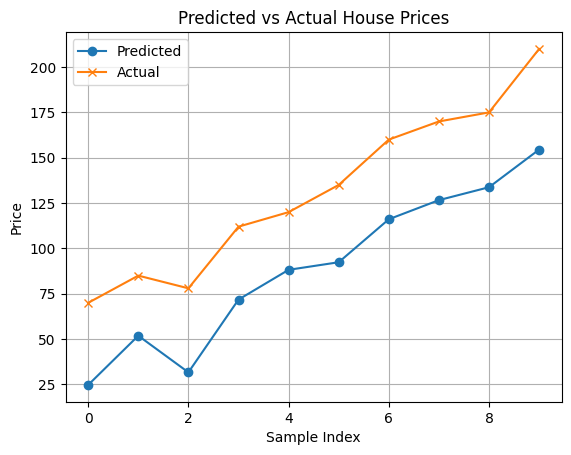

In [6]:
pred_y = [np.dot(w,x[i]) + b for i in range(m)]

# Plot
plt.plot(range(len(pred_y)), pred_y, marker='o', label='Predicted')
plt.plot(range(len(ys)), ys, marker='x', label='Actual')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.grid(True)
plt.show()
